In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df=pd.read_csv(r'C:\Users\Admin\Desktop\Kerfegar\Analytics&ML\Projects\Heart Disease Classification Model\heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#Checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#Calculating mean of continous features
dfp=df[df["target"]==1]
age=dfp['age'].mean()
tb=dfp['trestbps'].mean()
ecg=dfp['restecg'].mean()
ta=dfp['thalach'].mean()
print(age,tb,ecg,ta)

52.4969696969697 129.3030303030303 0.593939393939394 158.46666666666667


In [5]:
#Deriving general statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Deriving co-relation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


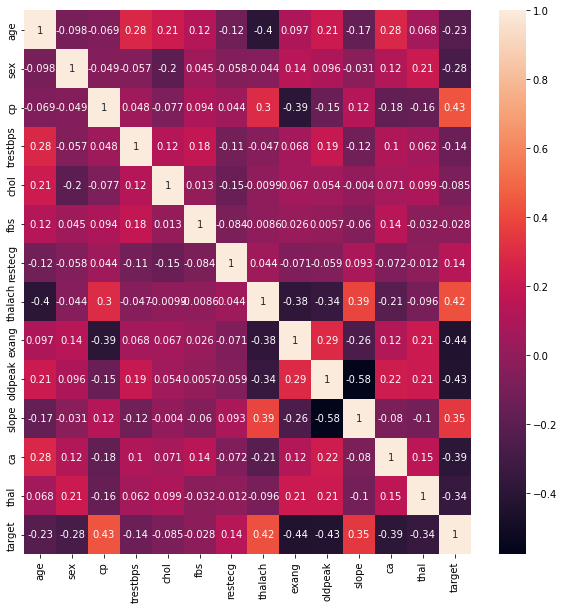

In [7]:
#Plotting Heatmap
df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
#Splitting the data into feature and target variables
x=df.drop('target',axis=1)
y=df['target']

In [9]:
#Spliting the data into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
#Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [11]:
#Generating predictions
ypreds=model.predict(x_test)
ypreds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [12]:
#Comparing actual and predicted values
comp=pd.DataFrame({"Actual":y_test,"Predicted":ypreds})
comp

,Actual,Predicted
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
249,0,0
104,1,1
300,0,0
193,0,0


In [13]:
#Generating ROC Curve
from sklearn.metrics import roc_curve
yprobs=model.predict_proba(x_test)
yprobs_positive=yprobs[:,1]
fpr,tpr,threshold=roc_curve(y_test,yprobs_positive)
threshold, yprobs[0,0]

(array([1.98408846e+00, 9.84088464e-01, 9.10297488e-01, 9.07309907e-01,
        8.12075689e-01, 8.12061089e-01, 7.95794770e-01, 7.86292536e-01,
        6.91428518e-01, 6.70329457e-01, 5.13927615e-01, 1.10698717e-01,
        7.22639857e-02, 6.92226924e-02, 6.80292661e-02, 3.99084228e-02,
        3.77939212e-02, 5.27080862e-04]),
 0.8893012832237807)

In [14]:
from sklearn.metrics import accuracy_score
acc=[]
for t in threshold:
    for i in range(0,len(threshold)):
        if yprobs[i,1]>t:
            ypreds[i]=1
        else:
            ypreds[i]=0
    acc.append(accuracy_score(y_test,ypreds))

In [15]:
optimum_thresh=pd.DataFrame({"Threshold":threshold,"Accuracy":acc})
optimum_thresh.sort_values(by='Accuracy',ascending=False)

,Threshold,Accuracy
10,0.513928,0.885246
11,0.110699,0.885246
15,0.039908,0.868852
7,0.786293,0.868852
16,0.037794,0.868852
12,0.072264,0.868852
13,0.069223,0.868852
14,0.068029,0.868852
9,0.670329,0.852459
5,0.812061,0.852459


In [16]:
comp2=pd.DataFrame({"Actual":y_test,"Predicted":ypreds})
comp2

,Actual,Predicted
179,0,1
228,0,1
111,1,1
246,0,1
60,1,1
...,...,...
249,0,0
104,1,1
300,0,0
193,0,0


Text(0, 0.5, 'Accuracy')

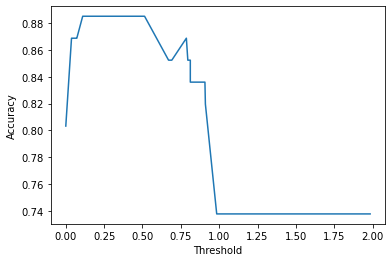

In [17]:
plt.plot(optimum_thresh['Threshold'],optimum_thresh['Accuracy'])
plt.xlabel("Threshold")
plt.ylabel("Accuracy")

In [18]:
for i in range(0,len(y_test)):
    if yprobs[i,0]>0.513928:
        ypreds[i]=1
    else:
         ypreds[i]=0

In [19]:
ypreds

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

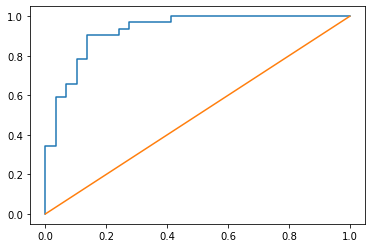

In [24]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

In [21]:
#Generating confusion matrix
from sklearn.metrics import confusion_matrix
matx=confusion_matrix(y_test,ypreds)
matx

array([[ 4, 25],
       [29,  3]], dtype=int64)

<AxesSubplot:>

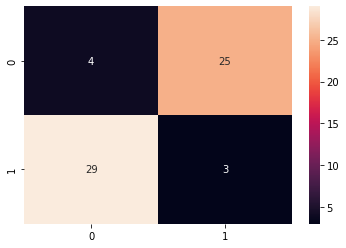

In [22]:
#Visualising the confusion matrix
sns.heatmap(matx, annot=True)